<a href="https://colab.research.google.com/github/matczu-97/CloudCourse/blob/main/Lab6_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running the example, the accuracy on the training and validation test is printed
each epoch and at the end of the classification error rate is printed.

Note: Your results may vary given the stochastic nature of the algorithm or
evaluation procedure, or differences in numerical precision. Consider running the example
a few times and compare the average outcome.

In [1]:
import random
# Simple ANN for the Fashion_MNIST Dataset
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

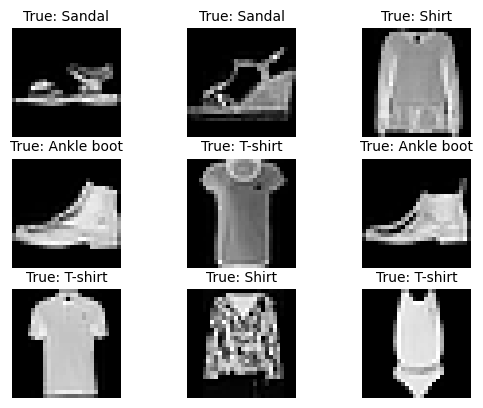

In [5]:
# plot random 9 images
rows = 3
cols = 3
nTrain = x_train.shape[0]
fig, axs = plt.subplots(rows,cols)
# plot first 9 images
for i in range(rows):
    for j in range(cols):
        index = random.randint(0,nTrain)
        axs[i,j].imshow(x_train[index], cmap = 'gray')
        nameI = y_train[index]
        axs[i,j].axis('off')
        axs[i,j].set_title('True: %s' % names[nameI],
                          fontdict={'fontsize': 10})
# show the figure
plt.show()

In [6]:
# Convert the y vectors (integers) to binary class matrix.
cat_y_train = to_categorical(y_train)
cat_y_test = to_categorical(y_test)

# Get the number of classes (number of columns in the binary class matrix)
nClasses = cat_y_test.shape[1]

# Normalize the input data, for a more stable and efficient training of the neural network.
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
nClasses

10

In [20]:
# define a simple ANN model
def baseline_model():
	# create model
    model = Sequential() # linear stack of layers
    model.add(Flatten(input_shape=[28, 28])) # convert the input data into a 1D array (vector) of length 784 (28x28 = 784).
    model.add(Dense(300, activation="relu"))
    model.add(Dense(100, activation="relu"))
    #model.add(Dense(100, activation="relu"))
    model.add(Dense(nClasses, activation="softmax"))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
# build the model
model = baseline_model()
model.summary()
# Fit the model
numEpochs = 15
history=model.fit(x_train, cat_y_train, validation_data=(x_test, cat_y_test), epochs=numEpochs, batch_size=200)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
300/300 [==============================] - 2s 6ms/step - loss: 0.6272 - accuracy: 0.7921 - val_loss: 0.4706 - val_accuracy: 0.8311
Epoch 2/

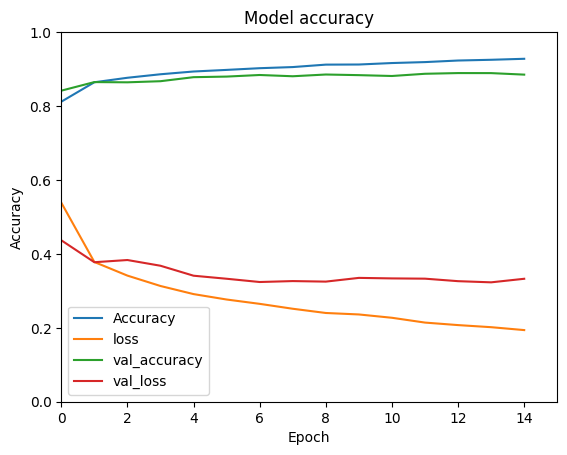

In [10]:
#Process ploting
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.axis([0,numEpochs,0,1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','loss','val_accuracy','val_loss'], loc='lower left')
plt.show()

In [11]:
# Final evaluation of the model
scores = model.evaluate(x_test, cat_y_test, verbose=0)
print("ANN validation accuracy: %.2f" % (scores[1]))

ANN validation accuracy: 0.88


In [12]:
#make  predictions
pred = model.predict(x_test)
nTest = x_test.shape[0]

313/313 [==============================] - 0s 1ms/step


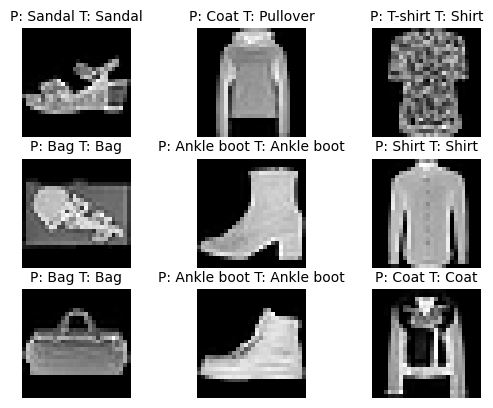

In [13]:
fig, axs = plt.subplots(rows,cols)
# plot random 9 images
for i in range(rows):
    for j in range(cols):
        index = random.randint(0,nTest)
        axs[i,j].imshow(x_test[index], cmap = 'gray')
        axs[i,j].axis('off')
        predI = pred[index].argmax()
        real = y_test[index]
        axs[i,j].set_title('P: %s T: %s' % (names[predI],
                            names[real]),fontdict={'fontsize': 10})
# show the figure
plt.show()